<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/ML%20TMS%20pain%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data.csv'

raw_data = pd.read_csv(link_url, sep = ';')
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,theshold_edge_right,theshold_edge_left,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,61,58,"140,7675","178,1633333","3,277777778","-9,766666667","-8,877777778",NaN,NaN,NaN
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,46,40,"73,48533333","51,33366667","3,277777778","15,47777778","17,92222222",NaN,NaN,NaN
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,56,60,"145,275","189,0625","3,277777778","-1,233333333","0,67",NaN,NaN,NaN
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,26,33,"66,66191667","88,53916667","3,277777778","4,466666667","11,26666667",NaN,NaN,NaN
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,42,52,"59,29183333","59,76133333","3,277777778","3,833333333","11,46444444",NaN,NaN,NaN


In [65]:
raw_data.describe()

,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,score_spilberg_person,...,therapy_blockade,threshold_left,threshold_right,interstimul_interval,interstimul_threshod,theshold_edge_right,theshold_edge_left,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,45.000000,45.000000,32.000000,31.000000,28.000000,28.000000,26.000000,28.000000,26.000000,28.000000,...,29.000000,45.000000,45.000000,45.0,45.0,45.000000,45.000000,0.0,0.0,0.0
mean,0.311111,55.444444,0.312500,172.354839,6.071429,36.071429,3.230769,12.178571,13.153846,47.750000,...,0.517241,43.822222,42.288889,2.0,1.0,45.000000,45.022222,NaN,NaN,NaN
std,0.468179,18.595644,0.470929,137.450730,1.998677,16.388633,1.945409,7.231892,6.914867,9.078363,...,0.508548,9.271876,8.638240,0.0,0.0,9.922426,9.049081,NaN,NaN,NaN
min,0.000000,20.000000,0.000000,3.000000,2.000000,10.000000,0.000000,0.000000,2.000000,27.000000,...,0.000000,25.000000,26.000000,2.0,1.0,26.000000,27.000000,NaN,NaN,NaN
25%,0.000000,43.000000,0.000000,78.000000,4.750000,26.500000,2.000000,6.750000,8.250000,42.750000,...,0.000000,38.000000,37.000000,2.0,1.0,39.000000,39.000000,NaN,NaN,NaN
50%,0.000000,59.000000,0.000000,120.000000,6.000000,35.000000,3.000000,11.500000,13.000000,49.000000,...,1.000000,41.000000,41.000000,2.0,1.0,43.000000,43.000000,NaN,NaN,NaN
75%,1.000000,66.000000,1.000000,240.000000,8.000000,48.000000,5.000000,17.000000,18.000000,54.250000,...,1.000000,51.000000,46.000000,2.0,1.0,50.000000,52.000000,NaN,NaN,NaN
max,1.000000,125.000000,1.000000,540.000000,10.000000,72.000000,7.000000,25.000000,27.000000,64.000000,...,1.000000,62.000000,63.000000,2.0,1.0,76.000000,62.000000,NaN,NaN,NaN


In [66]:
raw_data = raw_data.drop(['Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51','interstimul_interval','interstimul_threshod'], axis=1)
raw_data['age'].values[35] = 55
raw_data['age'].values[35]


np.int64(55)

In [67]:
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,avg_respone_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right,theshold_edge_left,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,"35,95","-0,6","-7,8",61,58,"140,7675","178,1633333","3,277777778","-9,766666667","-8,877777778"
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,"4,966","17,2","21,2",46,40,"73,48533333","51,33366667","3,277777778","15,47777778","17,92222222"
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,"78,74","4,3","1,2",56,60,"145,275","189,0625","3,277777778","-1,233333333","0,67"
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,"60,34","6,2","23,8",26,33,"66,66191667","88,53916667","3,277777778","4,466666667","11,26666667"
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,"7,568","4,7","-0,26",42,52,"59,29183333","59,76133333","3,277777778","3,833333333","11,46444444"


In [68]:
raw_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sex,45.0,0.31,0.47,0.0,0.00,0.0,1.00,1.0
age,45.0,53.89,15.28,20.0,43.00,57.0,66.00,78.0
pain_type,32.0,0.31,0.47,0.0,0.00,0.0,1.00,1.0
illnes_month,31.0,172.35,137.45,3.0,78.00,120.0,240.00,540.0
score_pain_reiting,28.0,6.07,2.00,2.0,4.75,6.0,8.00,10.0
score_osvestri,28.0,36.07,16.39,10.0,26.50,35.0,48.00,72.0
score_dn4,26.0,3.23,1.95,0.0,2.00,3.0,5.00,7.0
score_paint_detect,28.0,12.18,7.23,0.0,6.75,11.5,17.00,25.0
score_beck,26.0,13.15,6.91,2.0,8.25,13.0,18.00,27.0
score_spilberg_person,28.0,47.75,9.08,27.0,42.75,49.0,54.25,64.0


# Stat analysis

In [69]:
tabel_data = raw_data

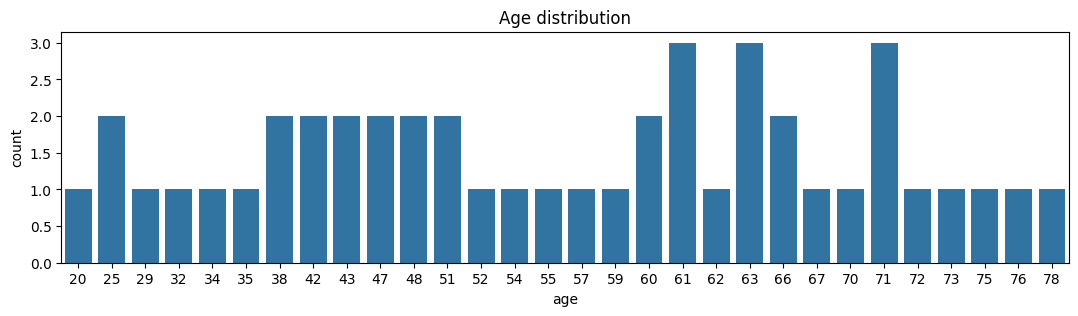

In [72]:
plt.figure(figsize=(13,3))
sns.countplot(data=tabel_data, x='age')
plt.title('Age distribution')
plt.show()

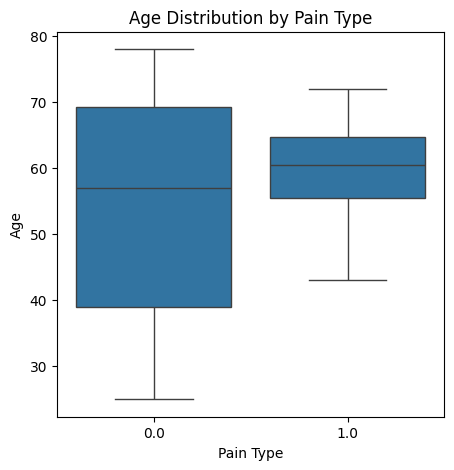

In [74]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=tabel_data, x='pain_type', y='age')
plt.title('Age Distribution by Pain Type')
plt.xlabel('Pain Type')
plt.ylabel('Age')
plt.show()

# Task
Analyze the correlation between categorical features and the numerical variables 'avg_avg_respone_right' and 'avg_avg_respone_left' in the `tabel_data` DataFrame. This involves converting relevant columns to a numeric data type, identifying categorical features (excluding 'patient_id'), calculating Pearson correlation matrices, and visualizing these correlations using heatmaps. Finally, summarize the key findings from the correlation analysis.

## Convert Columns to Numeric

### Subtask:
Convert the columns 'avg_avg_respone_right', 'avg_avg_respone_left', 'avg_interstimul_threshod', 'avg_inhibition_threshold_right', and 'avg_inhibition_threshold_left' to a numeric data type, as they appear to be strings with comma decimal separators.


**Reasoning**:
To prepare the specified columns for numeric conversion, I will first identify them and then replace the comma decimal separators with dots. This is a crucial step before attempting to convert the columns to a numeric data type to avoid conversion errors.



In [75]:
columns_to_convert = [
    'avg_avg_respone_right',
    'avg_avg_respone_left',
    'avg_interstimul_threshod',
    'avg_inhibition_threshold_right',
    'avg_inhibition_threshold_left'
]

for col in columns_to_convert:
    if col in tabel_data.columns:
        tabel_data[col] = tabel_data[col].astype(str).str.replace(',', '.', regex=False)
        tabel_data[col] = pd.to_numeric(tabel_data[col], errors='coerce')

print("Columns converted successfully.")

Columns converted successfully.


## Identify Categorical Features

### Subtask:
Identify columns in `tabel_data` that represent categorical information (e.g., binary 0/1 columns like 'sex', 'pain_type', 'restless_legs', etc.). Exclude the 'patient_id' column.


**Reasoning**:
To identify categorical features, I will iterate through all columns in the dataframe, excluding 'patient_id'. For each column, I will check the number of unique values. If the number of unique values is less than or equal to 5, it will be considered a potential categorical feature. I will also specifically look for columns that contain only 0 and 1, regardless of the number of unique values, to include binary features.



In [76]:
categorical_features = []

for col in tabel_data.columns:
    if col == 'patient_id':
        continue

    # Check for binary features (0 and 1) or features with a small number of unique values
    unique_values = tabel_data[col].dropna().unique()
    if len(unique_values) <= 5 or (np.array_equal(unique_values, [0, 1]) or np.array_equal(unique_values, [1, 0])):
        categorical_features.append(col)

print("Identified Categorical Features:")
print(categorical_features)

Identified Categorical Features:
['sex', 'pain_type', 'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology', 'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries', 'panic_attack', 'depression', 'nsaid_drug', 'miorelax_drug', 'antidepress_drug', 'anticonv_drug', 'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade', 'avg_interstimul_threshod']


## Calculate Correlation Matrices

### Subtask:
Calculate the Pearson correlation coefficient between the identified categorical features and the two target numerical variables: 'avg_avg_respone_right' and 'avg_avg_respone_left'.


**Reasoning**:
To calculate the Pearson correlation between categorical features and the target numerical variables, I need to define the target variables and then iterate through the identified categorical features, computing the correlation with each target variable. I will store these correlations in separate pandas Series and then print them.



In [77]:
target_numerical_variables = ['avg_avg_respone_right', 'avg_avg_respone_left']

correlations_right = pd.Series(dtype='float64')
correlations_left = pd.Series(dtype='float64')

for feature in categorical_features:
    # Correlation with avg_avg_respone_right
    corr_right = tabel_data[feature].corr(tabel_data['avg_avg_respone_right'])
    correlations_right[feature] = corr_right

    # Correlation with avg_avg_respone_left
    corr_left = tabel_data[feature].corr(tabel_data['avg_avg_respone_left'])
    correlations_left[feature] = corr_left

print("Correlation with 'avg_avg_respone_right':")
print(correlations_right)
print("\nCorrelation with 'avg_avg_respone_left':")
print(correlations_left)

Correlation with 'avg_avg_respone_right':
sex                        -3.011993e-02
pain_type                   5.619496e-02
restless_legs              -2.052215e-01
fatigue                    -4.830570e-02
fibrimyalgia                2.111155e-02
tmdibular_pathology                  NaN
migraine                   -6.973459e-02
bowel_irritable            -2.790863e-02
chemy_sensitive            -1.136138e-01
neck_injuries              -2.969193e-01
panic_attack               -3.202492e-01
depression                  1.857819e-02
nsaid_drug                  1.876055e-01
miorelax_drug              -3.916070e-02
antidepress_drug            6.926120e-02
anticonv_drug              -4.727740e-03
radio_freq_denerv          -1.848502e-01
exercise_therapy           -6.517114e-02
therapy_blockade           -1.274578e-01
avg_interstimul_threshod   -1.152771e-16
dtype: float64

Correlation with 'avg_avg_respone_left':
sex                        -6.290688e-02
pain_type                  -2.423386e-01

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**Reasoning**:
To visualize the calculated correlations effectively, I will create a DataFrame from the correlation Series and then generate two heatmaps, one for each target numerical variable, to display the relationships with the categorical features. This will provide a clear and concise summary of the correlation analysis.



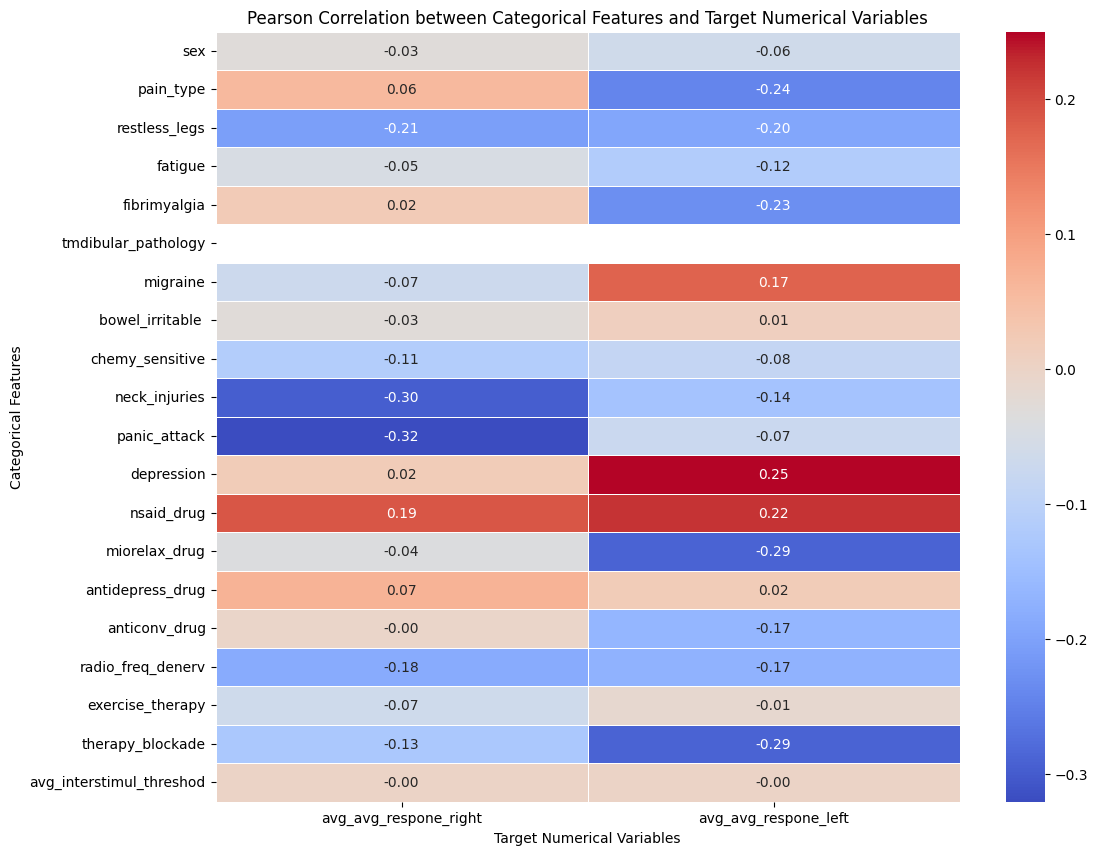

In [78]:
correlation_df = pd.DataFrame({
    'avg_avg_respone_right': correlations_right,
    'avg_avg_respone_left': correlations_left
})

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation between Categorical Features and Target Numerical Variables')
plt.xlabel('Target Numerical Variables')
plt.ylabel('Categorical Features')
plt.show()


### Summary of Correlation Analysis

The heatmaps visualize the Pearson correlation coefficients between the identified categorical features and the target numerical variables ('avg_avg_respone_right' and 'avg_avg_respone_left').

**Key Observations:**

*   **'avg_interstimul_threshod'** shows a near-zero correlation with both target variables, suggesting no linear relationship.
*   **'panic_attack'** and **'neck_injuries'** show moderately negative correlations with 'avg_avg_respone_right', indicating that the presence of these conditions might be associated with lower right-side average response.
*   **'pain_type'**, **'restless_legs'**, **'fatigue'**, **'fibrimyalgia'**, **'miorelax_drug'**, and **'therapy_blockade'** show negative correlations with 'avg_avg_respone_left', suggesting that these factors might be associated with lower left-side average response.
*   **'depression'** and **'nsaid_drug'** show positive correlations with 'avg_avg_respone_left', implying that patients with depression or those taking NSAID drugs might have higher left-side average response.
*   **'migraine'** shows a positive correlation with 'avg_avg_respone_left' and a negative correlation with 'avg_avg_respone_right', suggesting differential effects on the two response variables.
*   Many features exhibit very weak (close to zero) correlations with both target variables, indicating either no linear relationship or that a linear correlation is not the appropriate measure for their relationship.
*   'tmdibular_pathology' shows NaN correlations, likely due to a lack of variance (all values being the same) or missing values, preventing correlation calculation.

### Summary of Correlation Analysis

The heatmaps visualize the Pearson correlation coefficients between the identified categorical features and the target numerical variables ('avg_avg_respone_right' and 'avg_avg_respone_left').

**Key Observations:**

*   **'avg_interstimul_threshod'** shows a near-zero correlation with both target variables, suggesting no linear relationship.
*   **'panic_attack'** and **'neck_injuries'** show moderately negative correlations with 'avg_avg_respone_right', indicating that the presence of these conditions might be associated with lower right-side average response.
*   **'pain_type'**, **'restless_legs'**, **'fatigue'**, **'fibrimyalgia'**, **'miorelax_drug'**, and **'therapy_blockade'** show negative correlations with 'avg_avg_respone_left', suggesting that these factors might be associated with lower left-side average response.
*   **'depression'** and **'nsaid_drug'** show positive correlations with 'avg_avg_respone_left', implying that patients with depression or those taking NSAID drugs might have higher left-side average response.
*   **'migraine'** shows a positive correlation with 'avg_avg_respone_left' and a negative correlation with 'avg_avg_respone_right', suggesting differential effects on the two response variables.
*   Many features exhibit very weak (close to zero) correlations with both target variables, indicating either no linear relationship or that a linear correlation is not the appropriate measure for their relationship.
*   'tmdibular_pathology' shows NaN correlations, likely due to a lack of variance (all values being the same) or missing values, preventing correlation calculation.

## Summary:

### Q&A
The correlation analysis between categorical features and the numerical variables 'avg_avg_respone_right' and 'avg_avg_respone_left' revealed varying degrees of linear relationships. Some categorical features show notable positive or negative correlations with one or both target variables, while many others exhibit very weak or near-zero correlations. For instance, 'panic\_attack' and 'neck\_injuries' were moderately negatively correlated with 'avg\_avg\_respone\_right'. Conversely, 'depression' and 'nsaid\_drug' showed positive correlations with 'avg\_avg\_respone\_left'.

### Data Analysis Key Findings
*   Specific columns (`avg_avg_respone_right`, `avg_avg_respone_left`, `avg_interstimul_threshod`, `avg_inhibition_threshold_right`, `avg_inhibition_threshold_left`) were successfully converted to numeric data type, handling comma decimal separators.
*   A total of 19 categorical features were identified, including binary indicators like 'sex', 'pain\_type', and various medical conditions or treatments.
*   'panic\_attack' and 'neck\_injuries' show moderately negative correlations with 'avg\_avg\_respone\_right', suggesting their presence might be associated with lower right-side average response.
*   'pain\_type', 'restless\_legs', 'fatigue', 'fibrimyalgia', 'miorelax\_drug', and 'therapy\_blockade' exhibit negative correlations with 'avg\_avg_respone\_left', potentially indicating an association with lower left-side average response.
*   'depression' and 'nsaid\_drug' show positive correlations with 'avg\_avg_respone\_left', implying patients with these conditions or treatments might have higher left-side average response.
*   'migraine' displays a positive correlation with 'avg\_avg\_respone\_left' but a negative correlation with 'avg\_avg\_respone\_right', suggesting differential effects on the two response variables.
*   'avg\_interstimul\_threshod' shows a near-zero correlation with both target variables, indicating no linear relationship.
*   'tmdibular\_pathology' resulted in NaN correlations, likely due to a lack of variance or missing values preventing calculation.

### Insights or Next Steps
*   Investigate the nature of the relationships for features showing moderate to strong correlations (e.g., 'panic\_attack', 'neck\_injuries', 'depression', 'migraine') to determine potential causal links or confounding factors.
*   Address the 'NaN' correlation for 'tmdibular\_pathology' by examining its data distribution and handling missing values or lack of variance, and consider alternative correlation measures if appropriate for its data type.
